In [3]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from datetime import datetime
#pd.set_printoptions(notebook_repr_html=False)

from pandas import *

import matplotlib as mpl
mpl.rc('figure', figsize=(12, 6))
#set_printoptions(max_columns=18)
months = {'JAN' : 1, 'FEB' : 2, 'MAR' : 3, 'APR' : 4, 'MAY' : 5, 'JUN' : 6,
          'JUL' : 7, 'AUG' : 8, 'SEP' : 9, 'OCT': 10, 'NOV': 11, 'DEC' : 12}
of_interest = ['Obama, Barack', 'Romney, Mitt', 'Santorum, Rick', 
               'Paul, Ron', 'Gingrich, Newt']
#set_printoptions(notebook_repr_html=False)
parties = {
  'Bachmann, Michelle': 'Republican',
  'Romney, Mitt': 'Republican',
  'Obama, Barack': 'Democrat',
  "Roemer, Charles E. 'Buddy' III": 'Republican',
  'Pawlenty, Timothy': 'Republican',
  'Johnson, Gary Earl': 'Republican',
  'Paul, Ron': 'Republican',
  'Santorum, Rick': 'Republican',
  'Cain, Herman': 'Republican',
  'Gingrich, Newt': 'Republican',
  'McCotter, Thaddeus G': 'Republican',
  'Huntsman, Jon': 'Republican',
  'Perry, Rick': 'Republican'           
 }
main_cands = ['Obama, Barack', 'Romney, Mitt']
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED'
}

In [26]:
fec = pd.read_pickle('data/fec.pickle')
fec

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250,20-JUN-11
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50,23-JUN-11
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250,05-JUL-11
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250,01-AUG-11
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300,20-JUN-11
5,"Bachmann, Michelle","BECKMAN, JAMES",AR,NONE,RETIRED,500,23-JUN-11
6,"Bachmann, Michelle","BLEVINS, DARONDA",AR,INFORMATION REQUESTED,INFORMATION REQUESTED,250,21-JUN-11
7,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250,05-JUL-11
8,"Bachmann, Michelle","COLLINS, SARAH",AZ,ST. JOSEPH HOSPITAL,RN,250,21-JUN-11
9,"Bachmann, Michelle","COLEMAN, RONALD",AZ,RAYTHEON,ELECTRICAL ENGINEER,250,20-JUN-11


In [27]:
fec.contb_receipt_dt[0]

'20-JUN-11'

In [28]:
months = {'JAN' : 1, 'FEB' : 2, 'MAR' : 3, 'APR' : 4, 'MAY' : 5, 'JUN' : 6,
          'JUL' : 7, 'AUG' : 8, 'SEP' : 9, 'OCT': 10, 'NOV': 11, 'DEC' : 12}

def convert_date(datestr):
    ds = datestr.split('-')
    y = 2000 + int(ds[2])
    m = months[ds[1]]
    d = int(ds[0])
    return datetime(y, m, d)

def convert_date2(datestr):
    return datetime.strptime(datestr, '%d-%b-%y')

fec.contb_receipt_dt = fec.contb_receipt_dt.map(convert_date2)

In [29]:
fec

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250,2011-06-20
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50,2011-06-23
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250,2011-07-05
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250,2011-08-01
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300,2011-06-20
5,"Bachmann, Michelle","BECKMAN, JAMES",AR,NONE,RETIRED,500,2011-06-23
6,"Bachmann, Michelle","BLEVINS, DARONDA",AR,INFORMATION REQUESTED,INFORMATION REQUESTED,250,2011-06-21
7,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250,2011-07-05
8,"Bachmann, Michelle","COLLINS, SARAH",AZ,ST. JOSEPH HOSPITAL,RN,250,2011-06-21
9,"Bachmann, Michelle","COLEMAN, RONALD",AZ,RAYTHEON,ELECTRICAL ENGINEER,250,2011-06-20


In [45]:
bydate = fec.pivot_table(values='contb_receipt_amt', index='contb_receipt_dt', columns=['cand_nm'], aggfunc='sum')
bydate_small = bydate[['Obama, Barack', 'Romney, Mitt']]
mbydate = bydate_small.resample('M', how='sum', kind='period').dropna()
mbydate

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_dt,,
2011-04,8220580.79,2028093.13
2011-05,6537807.79,6748735.75
2011-06,11642949.35,8251436.77
2011-07,3417404.38,2178462.94
2011-08,4620007.79,2273631.53
2011-09,15165839.38,7432453.25
2011-10,5744942.44,3526509.04
2011-11,5076100.31,6814234.46
2011-12,13416086.82,11118778.00


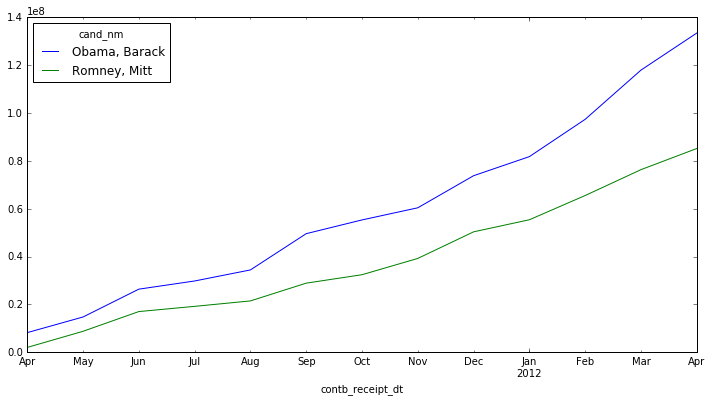

In [47]:
mbydate.cumsum().plot()

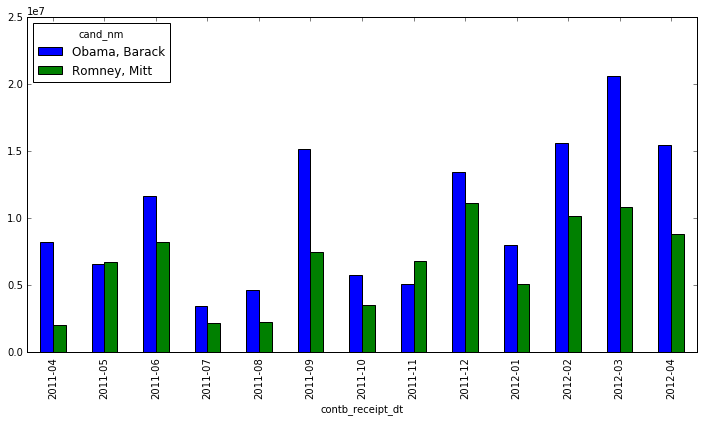

In [48]:
mbydate.plot(kind='bar')

In [49]:
fec.contb_receipt_amt.describe()

count    1001731.000000
mean         298.235150
std         3749.666723
min       -30800.000000
25%           35.000000
50%          100.000000
75%          250.000000
max      2014490.510000
Name: contb_receipt_amt, dtype: float64

In [50]:
#bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
bins = np.array([0, 1, 10, 100, 1000, 10000])

labels = cut(fec.contb_receipt_amt, bins)
labels

0            (100, 1000]
1              (10, 100]
2            (100, 1000]
3            (100, 1000]
4            (100, 1000]
5            (100, 1000]
6            (100, 1000]
7            (100, 1000]
8            (100, 1000]
9            (100, 1000]
10           (100, 1000]
11           (100, 1000]
12           (100, 1000]
13           (100, 1000]
14           (100, 1000]
15           (100, 1000]
16           (100, 1000]
17           (100, 1000]
18           (100, 1000]
19           (100, 1000]
20           (100, 1000]
21           (100, 1000]
22         (1000, 10000]
23         (1000, 10000]
24           (100, 1000]
25           (100, 1000]
26             (10, 100]
27           (100, 1000]
28           (100, 1000]
29           (100, 1000]
               ...      
1001701    (1000, 10000]
1001702    (1000, 10000]
1001703              NaN
1001704              NaN
1001705      (100, 1000]
1001706    (1000, 10000]
1001707              NaN
1001708    (1000, 10000]
1001709              NaN


In [57]:
fec1 = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]
#bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
bins = np.array([0, 1, 10, 100, 1000, 10000])

labels = cut(fec1.contb_receipt_amt, bins)
fec1.groupby([labels, 'cand_nm']).size().unstack('cand_nm')

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
